In [1]:
from __future__ import print_function, division

from IPython.core.display import Image

import numpy as np
import pandas as pd

from sqlalchemy import create_engine

import matplotlib.pyplot as plt
%matplotlib inline

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Feature Selection
Week 4 | Day 5

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Describe what feature selection means and why it is important
- Evaluate several techniques for feature selection
- Use L1 and L2 regularization for feature selection

## So you have some data and you want to make predictions on some target variable...

How do you know what to include in your model?

## Exercise

Partner up a consider the process of building a model - classification or regression. What should you do to determine if a feature is important in your model or not? Are there any consequences to just including everything?

## Why Select Features?

- To improve computation time
- To reduce memory footprint
- Reduce variance
- Improve model interpretability
- Simplify - Occam's Razor

## How Might We Select Features?

The are several ways we're going to cover....

## 1. Best Subset

### Remember our linear model...

$$ Y = \beta _0 + \beta _1 x_1 + ... \beta _p x _p + \epsilon $$

### Best Subset Procedure:<br><br>For $k = 1,2...p$  predictors, we fit all models of size k and choose the best of each size. ${p \choose x}$<br><br>So for example, we find the best model of all possible one predictor models, then best model of all possible 2 predictor models, and so on.<br><br>We the select the best model of all of the k-sized models.<br><br>We do this using cross validation with some metric such as AIC, BIC, or $\bar{R} ^2 $

*Akaike information criterion*  
*Bayesian information criterion*

## 2. Bottom Up: <br><br>Forward Stepwise aka Forward Selection

### Forward Stepwise Procedure: <br><br>From $\beta_0$, test each predictor, $p$, in isolation, to identify the  $\beta_1x_1$ that is most performant. <br><br>That model is then saved as $M_1$. Then this process is repeated for each successive predictor saving the models as you go $M_2$, $M_3$ etc... The best model is then selected through cross validation using your metric of choice.

## 3. Top Down: <br><br>Backwards Stepwise aka Backwards Elimination

### Backwards Stepwise Procedure:<br><br>You begin with $Y=\beta_0+\beta_1...\beta_p$. You then remove each feature that has the least impact on your model.<br><br>These models $M_0...M_p$ are then all tested for the best performance.

## 4. Regularization aka Shrinkage

- L1 or Lasso regularization: $$ R(f) \propto \sum{|\beta_i|}$$
- L2 or Ridge regularization: $$ R(f) \propto \sqrt{\sum{\beta_i^2}}$$

In [26]:
Image(url='http://webdancer.is-programmer.com/user_files/webdancer/Image/lasso.png')

## 5. Dimensionality Reduction

In two weeks we'll discuss how we can reduce the number of features by combining them using a processes called PCA or principle component analysis. This reduces the number of features into a smaller set of "orthogonal" features. This is somewhat different than eliminating features as it creates new features that are linear combinations of existing features.

<img src="http://i.imgur.com/OXS0I2i.png" width=600>

## 6. Algorithm-specific Methods

Some models offer an intrinsic way of evaluating feature importance. For example, as we will see next week, Decision Trees have a way to assess how much each feature is contributing to the overall prediction.

Logistic Regression also offers an intrinsic way of assessing feature importance. In fact, since the Logistic Regression model is linear in the features, the size of each coefficient represents the impact a unit change in that feature has on the overall model. In order to interpret this as feature importance, we need to make sure that features are normalized to have the same scale, otherwise a unit change in two different feature could actually imply a very different change.

## Let's take a look at feature selection with the iris data set

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

## Let's see our features

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

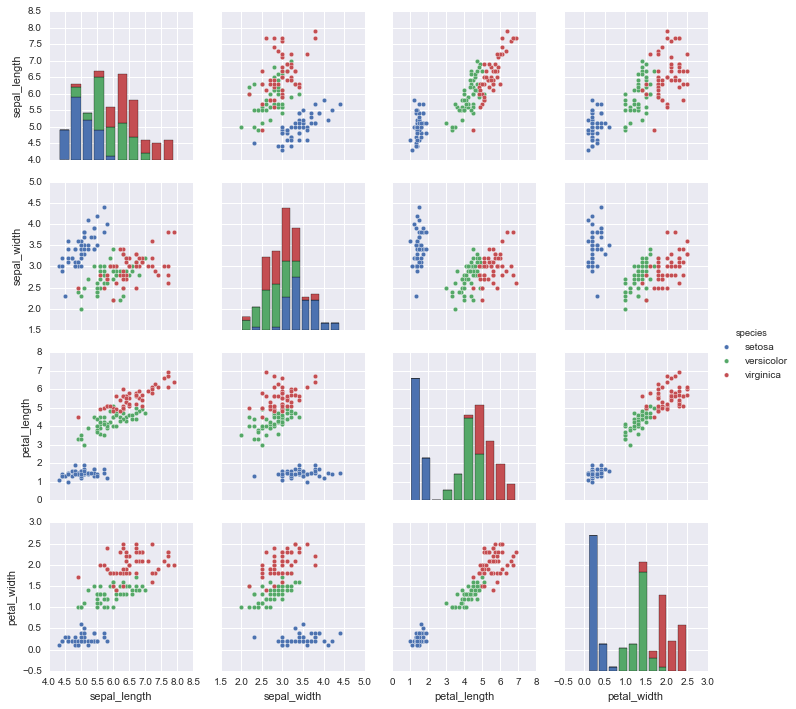

In [4]:
import seaborn as sns

sns_iris = sns.load_dataset("iris")

sns.pairplot(sns_iris, hue="species")

## Fit our model

In [5]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Let's look at the coefficients

In [6]:
model.coef_

array([[ 0.41498833,  1.46129739, -2.26214118, -1.0290951 ],
       [ 0.41663969, -1.60083319,  0.57765763, -1.38553843],
       [-1.70752515, -1.53426834,  2.47097168,  2.55538211]])

## So what is that?

coef_ : array, shape (n_classes, n_features)
    Coefficient of the features in the decision function.

## Let's clean that up

In [7]:
coeffs = pd.DataFrame(model.coef_, columns=iris.feature_names, index=iris.target_names)
coeffs

sepal length (cm)  sepal width (cm)  petal length (cm)  \
setosa               0.414988          1.461297          -2.262141   
versicolor           0.416640         -1.600833           0.577658   
virginica           -1.707525         -1.534268           2.470972   

            petal width (cm)  
setosa             -1.029095  
versicolor         -1.385538  
virginica           2.555382

## Check: Can we conclude that petal length (cm) is the most significant<br> feature to identify setosa?

Is there anything we might have missed?

# Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
X_norm =  StandardScaler().fit_transform(X)

model.fit(X_norm, y)

coeffs1 = pd.DataFrame(model.coef_, columns=iris.feature_names, index=iris.target_names)
#coeffs1

model2 = LogisticRegression(penalty='l2')
model2.fit(X_norm, y)

coeffs2 = pd.DataFrame(model2.coef_, columns=iris.feature_names, index=iris.target_names)
coeffs2

sepal length (cm)  sepal width (cm)  petal length (cm)  \
setosa              -0.810166          1.393699          -1.687386   
versicolor           0.130380         -1.246338           0.789195   
virginica            0.012990         -0.144535           1.863173   

            petal width (cm)  
setosa             -1.518991  
versicolor         -0.889440  
virginica           2.698873

### Now we can tell...

## Exercise

- Try changing the penalty in the model above to l1, how do the coefficients change?
- Check score with cross_val_score and select best model l1 or l2

In [11]:
model3 = LogisticRegression(penalty='l1')
model3.fit(X_norm, y)

coeffs3 = pd.DataFrame(model3.coef_, columns=iris.feature_names, index=iris.target_names)
coeffs3

sepal length (cm)  sepal width (cm)  petal length (cm)  \
setosa               0.000000          1.197815          -4.428135   
versicolor           0.029613         -1.239761           0.762369   
virginica            0.000000         -0.480923           2.708794   

            petal width (cm)  
setosa               0.00000  
versicolor          -0.76934  
virginica            4.58481

In [12]:
from sklearn.cross_validation import cross_val_score

In [14]:
cross_val_score(model2, X_norm, y)

array([ 0.88235294,  0.92156863,  0.89583333])

In [15]:
cross_val_score(model3, X_norm, y)

array([ 0.90196078,  0.92156863,  0.95833333])

## Let's now visualize the feature importance

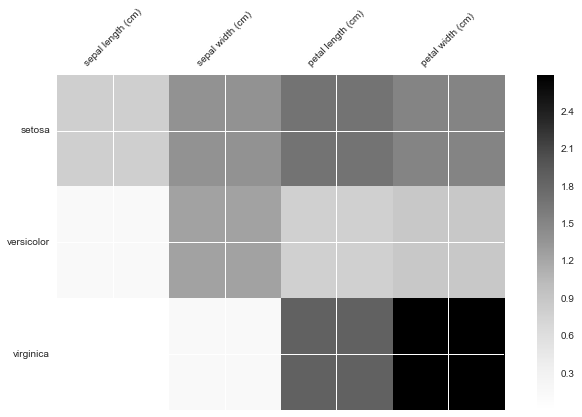

In [18]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
cax = ax.matshow(abs(coeffs2))

fig.colorbar(cax)

ax.set_xticklabels(['']+list(coeffs.columns), rotation=45);
ax.set_yticklabels(['']+list(coeffs.index));

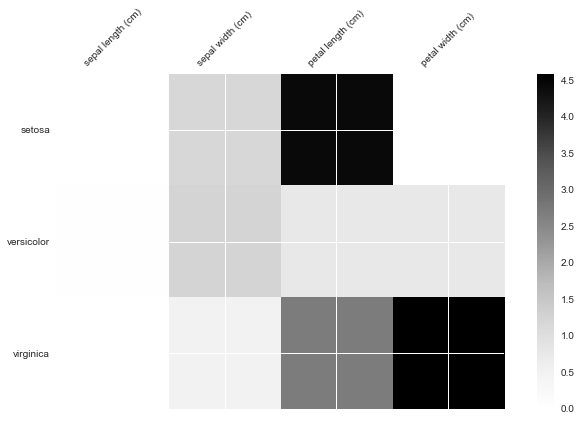

In [19]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
cax = ax.matshow(abs(coeffs3))

fig.colorbar(cax)

ax.set_xticklabels(['']+list(coeffs.columns), rotation=45);
ax.set_yticklabels(['']+list(coeffs.index));

## Independent Exercise

**Scikit-learn offers several other feature selection methods. Partner up for the following:**

Go to the documentation page, pick one method and read about it for 10 minutes.

Try to answer the following questions:

- Is it top-down or bottom-up?

- Does it work for both regression and classification?

- Can it be used in a pipeline?

In the last 10 minutes explain your findings to the class.

## Additional Resources

- https://www.quora.com/How-do-I-perform-feature-selection
- https://en.wikipedia.org/wiki/Akaike_information_criterion
- https://methodology.psu.edu/node/504